# Poly-Linear regression with scikit-Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step#1 : Read in our data
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# Step#2 : EDA
# We should do our Data Explorations as usual 
# Once we har read to start our ML process

In [4]:
# Step#3 : Divide our data into X features ( independent) and y Label (dependent on X features)
X = df.drop('sales',axis=1)
y = df['sales']

In [5]:
X.shape

(200, 3)

In [6]:
y.shape

(200,)

In [5]:
# Step#4 : Polynomial Enhancement for our Linear Regression ( once needed)

from sklearn.preprocessing import PolynomialFeatures
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._polynomial:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Read more in the :ref:`User Guide <polynomial_features>`.
 |  
 |  Parameters
 |  ----------
 |  degree : int or tuple (min_degree, max_degree), default=2
 |      If a single int is given, it specifies the maximal degree of the
 |      polynomial features. If a tuple `(min_degree, max_degree)` is passed,
 |      then `min_degree` is the minimum and `max_degree` is the maximum
 |

In [6]:
polynomial_convertor = PolynomialFeatures(degree=2, # 2 is the default but good to mentioned for readability
                                          include_bias=False)# False : because we follow this Poly-process with LR

In [7]:
# poly_X
poly_features = polynomial_convertor.fit_transform(X)

In [10]:
X.shape

(200, 3)

In [11]:
poly_features.shape

(200, 9)

In [12]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [13]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
# Documentation for our poly-Dataset
# [TV , radio , newspaper , TV^2 , TV*radio , TV*newspaper , radio^2 , radio * newspaper , newspaper^2]
# ==> [x1 , x2, x3 , x1^2 , x1*x2 , x1*x3 , x2^2 , x2*x3 , x3^2 ]

In [14]:
poly_features[0][:3] #==> [Tv , radio , newspaper]

array([230.1,  37.8,  69.2])

In [15]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

In [16]:
# interaction terms 
230.1 * 37.8 # TV * radio

8697.779999999999

In [17]:
230.1*69.2 # TV * newspaper

15922.92

In [18]:
37.8*69.2 # radio * newspaper

2615.7599999999998

In [8]:
# Step#5 : train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [9]:
# Step#6 : Create and train our LR model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # fit_intercept by default True

In [10]:
model.fit(X_train,y_train) # Training model with our original True data

LinearRegression()

In [22]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [ ]:
# Documentation for our poly-Dataset
# [TV , radio , newspaper , TV^2 , TV*radio , TV*newspaper , radio^2 , radio * newspaper , newspaper^2]
# [TV: +0.0517 , radio: +0.013 , newspaper: +0.012 , TV^2 : - 0.00011 , TV*radio: +0.0011 ,TV*newspaper:-0.000052 ,radio^2:+0.000033 , 
#  radio * newspaper : +0.001 , newspaper^2 : -0.00003 ]

In [11]:
# Step7 : Model Evaluation and  calculate  Errors and scores
y_pred = model.predict(X_test) # NOTICE _ OUR MODEL HAS NEVER TRAINED WITH X_TEST

In [12]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
MAE = mean_absolute_error(y_true=y_test , y_pred=y_pred)
print(f"Mean Absolute error for this model is {MAE} Before Poly was 1.2")

Mean Absolute error for this model is 0.48967980448034976 Before Poly was 1.2


In [13]:
MSE = mean_squared_error(y_true=y_test , y_pred=y_pred)
print(f"Mean Squared Error for this model is {MSE} Before Poly was 2.2")

Mean Squared Error for this model is 0.44175055104032607 Before Poly was 2.2


In [14]:
RMSE = np.sqrt(MSE) # RMSE = MSE**0.5 or RMSE = sqrt(MSE) 
print(f"Root Mean Squared Error for this model is {RMSE} Before Poly was 1.51")

Root Mean Squared Error for this model is 0.6646431757268904 Before Poly was 1.51


In [15]:
# more indication for what mean this errors , so I can calculate Tolerance
tolerance = RMSE / y.mean()
print(f" Tolerance for this model based on prediction value = {tolerance} Before Poly was 0.108")

 Tolerance for this model based on prediction value = 0.047398336653727245 Before Poly was 0.108


In [16]:
model_r2_score = r2_score(y_true=y_test , y_pred=y_pred)
print(f" R2_score for our model is {model_r2_score} was 0.92")

 R2_score for our model is 0.9843529333146801 was 0.92


In [17]:
# Step#8 : Bias-Variation trade-off 

train_rmse_errors = []
test_rmse_errors = []

for d in range(1,11):
    # create poly-convertor
    polynomial_convertor = PolynomialFeatures(degree=d,include_bias=False)
    # Create our Poly X
    poly_features = polynomial_convertor.fit_transform(X)
    # train_test_split
    X_train, X_test, y_train, y_test = train_test_split(poly_features,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=101)
    # Train our model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    #Calculate and collect RMSE
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_RMSE = mean_squared_error(y_train,train_pred)**0.5
    test_RMSE = mean_squared_error(y_test,test_pred)**0.5

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [18]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020673,
 0.35170836883993456,
 0.25093429485505625,
 0.19691672942540403,
 5.421838841678279,
 0.14170255192236753,
 0.17153614111709573,
 0.20515923589591162]

In [19]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757268904,
 0.5803286825247139,
 0.5077742650960927,
 2.5758230801052475,
 4.379888840549716,
 1378.9214332938911,
 4352.784286134555,
 95705.66358922048,
 946059.4039690299]

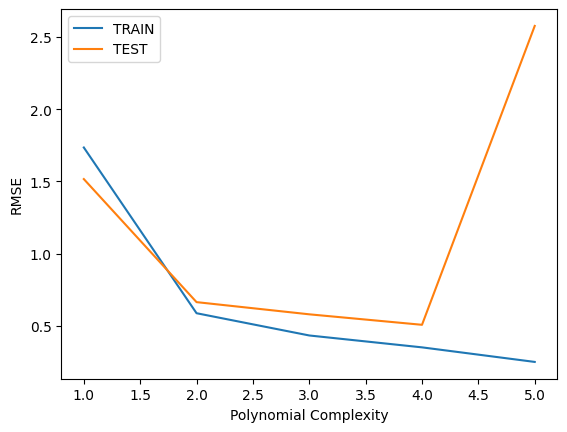

In [20]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [21]:
# Step 8/9 : choose right degree (3) Save model after we get OK for this result

final_poly_convertor = PolynomialFeatures(degree=3,include_bias=False)
final_model = LinearRegression()
poly_X = final_poly_convertor.fit_transform(X)
final_model.fit(poly_X,y)

LinearRegression()

In [22]:
final_model.coef_

array([ 8.96744296e-02,  3.87306507e-02,  1.40116785e-02, -4.39852533e-04,
        1.38525353e-03, -2.11551525e-04, -5.78622015e-04, -3.39038010e-04,
        2.30693236e-04,  7.62775843e-07, -1.21636828e-06,  7.24494002e-07,
        1.79932497e-06, -1.51021227e-06, -1.14841391e-07,  3.32749144e-06,
        4.93904244e-06,  2.67349509e-06, -2.30514930e-06])

In [23]:
model.coef_

array([ 9.57559518e-12, -2.62139825e-12, -2.83959680e-12, -5.82867553e-13,
        2.31188109e-13,  1.23988325e-12,  1.59035482e-13,  2.47642057e-13,
        2.57233109e-13, -6.00032817e-14,  7.40954147e-14,  2.89793011e-14,
       -4.89019774e-14,  9.40064692e-14,  1.08322641e-13, -1.26376260e-13,
        1.77418472e-14,  2.11376967e-14, -1.35717913e-15,  5.46386096e-13,
        1.40611949e-14,  2.87375038e-13,  7.40290592e-15,  3.41424323e-14,
        9.30641032e-14,  7.50840849e-15,  1.37410886e-14,  2.92288653e-14,
        8.07586772e-15,  1.02361005e-14, -1.35268555e-16, -1.62522815e-15,
        6.09017770e-15,  7.56970871e-15,  1.13202883e-11,  3.39545889e-12,
        1.09013218e-11,  8.13945822e-13,  1.93865990e-12,  4.18711635e-12,
        1.48442285e-13,  3.87516571e-13,  7.37271972e-13,  1.30831464e-12,
        2.09766442e-14,  7.23556495e-14,  1.44283268e-13,  2.47159300e-13,
        3.77183471e-13,  9.38272669e-16,  1.29080201e-14,  2.98372698e-14,
        5.15573947e-14,  

In [24]:
from joblib import dump
# dump out ML model 
dump(final_model,"poly_final_model_202401_18.joblib") 

['poly_final_model_202401_18.joblib']

In [25]:
# dump out poly_convertor
dump(final_poly_convertor,"poly_convertor_2024_01_18.joblib")

['poly_convertor_2024_01_18.joblib']

In [26]:
# In case we need to use them so we follow : 
# 1- load the convertor and the model
# 2- convert the input
# 3- calculate the prediction 
from joblib import load
my_loaded_model = load("poly_final_model_202401_18.joblib")
my_loaded_convertor = load("poly_convertor_2024_01_18.joblib")

In [27]:
# our campaign 
campaign = [[149,22,12]]
campaign_poly = my_loaded_convertor.transform(campaign)
campaign_poly

c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [28]:
result = my_loaded_model.predict(campaign_poly)

In [29]:
result

array([14.64501014])

In [30]:
campaign_2 = [[335,40,23]]
campaign_poly_2 = my_loaded_convertor.transform(campaign_2)
result_2 = my_loaded_model.predict(campaign_poly_2)
result_2

c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([28.29876345])